In [1]:
import numpy as np
from pandas.core import datetools
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
#from sklearn import train_test_split
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
%matplotlib inline

C:\Users\eu\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from ipykernel import kernelapp as app


In [2]:
df = pd.read_csv('data/2017.csv')
pd.get_dummies(data=df, columns=['Country'])
X = df.drop(['Economy..GDP.per.Capita.'], 1)
Y = df['Economy..GDP.per.Capita.']


In [3]:
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X)
X_all.head()

,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,...,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0,0,0,0,0,0,0,0,0,0,...,1,7.537,7.594445,7.479556,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,0,0,0,0,0,0,0,0,0,0,...,2,7.522,7.581728,7.462272,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,0,0,0,0,0,0,0,0,0,0,...,3,7.504,7.622030,7.385970,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,0,0,0,0,0,0,0,0,0,0,...,4,7.494,7.561772,7.426227,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,0,0,0,0,0,0,0,0,0,0,...,5,7.469,7.527542,7.410458,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


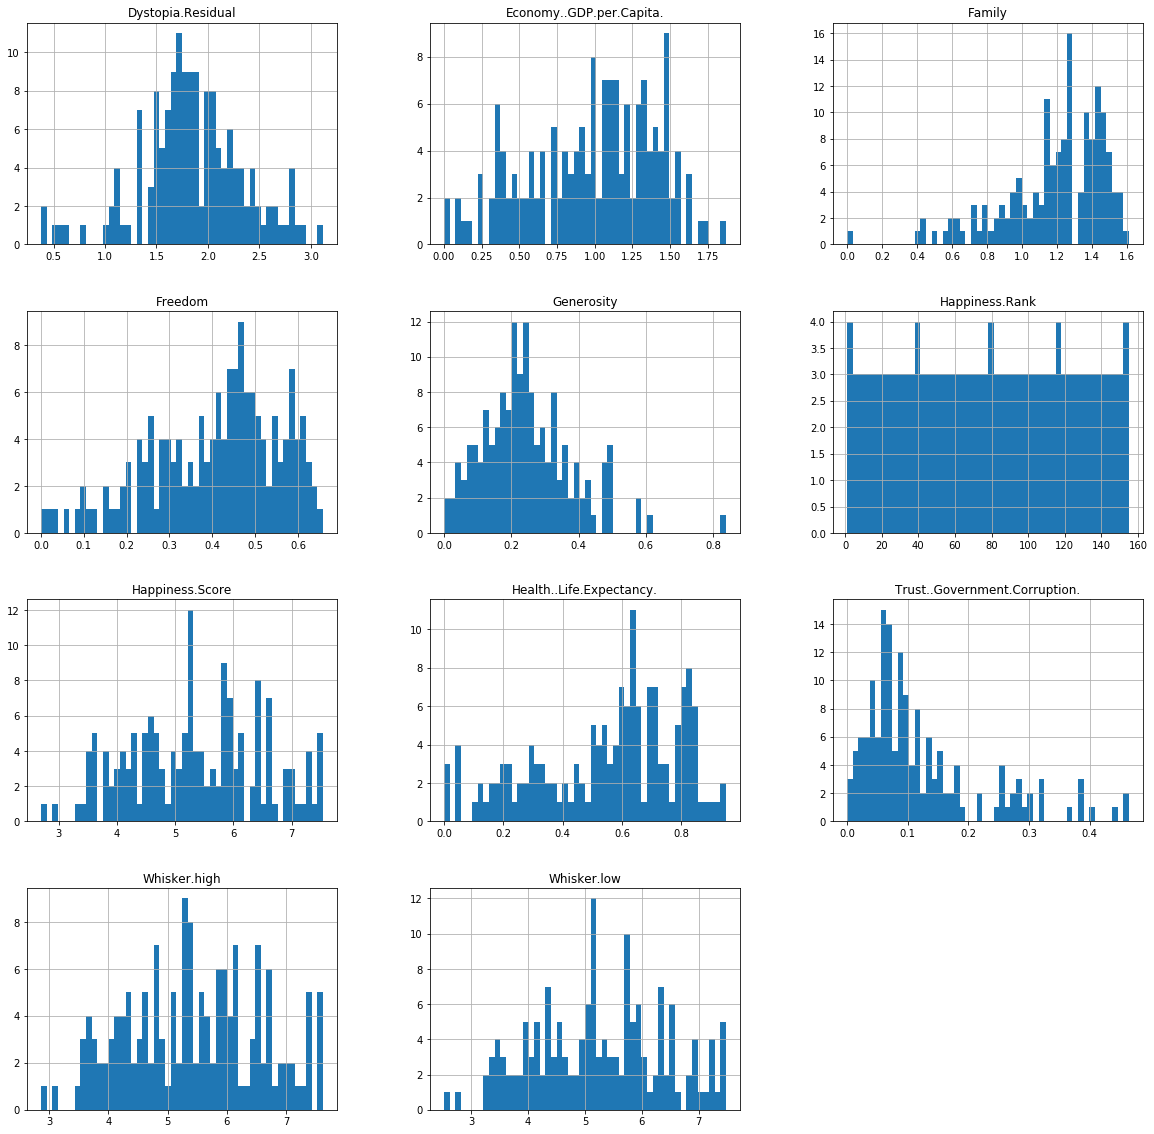

In [4]:
df.hist(bins=50, figsize=(20,20))
plt.show()

In [5]:
country = df['Country']
happiness_score = df['Happiness.Score']
gdp = df['Economy..GDP.per.Capita.']
family = df['Family']
life_exp = df['Health..Life.Expectancy.']
freedom = df['Freedom']
generosity = df['Generosity']
gov_trust = df['Trust..Government.Corruption.']

def deviation(data):
    data_mean = np.mean(data)
    return [ds - data_mean for ds in data]

def coveriance(x, y):
    n = len(x)
    return np.dot(deviation(x), deviation(y)) / (n-1)

def correlation(x , y):
    stddevx = x.std()
    stddevy = y.std()
    return coveriance(x, y) / stddevx / stddevy

def predict(x):
    return slope * x + intercept

def shuffle(a, b, seed):
   rand_state = np.random.RandomState(seed)
   rand_state.shuffle(a)
   rand_state.seed(seed)
   rand_state.shuffle(b)

def visualize_happiness(dataset):
    sns.lmplot('Happiness.Score','Family',data=dataset,fit_reg=False) 
    sns.lmplot('Happiness.Score','Generosity',data=dataset,fit_reg=False)  
    sns.lmplot('Happiness.Score','Trust..Government.Corruption.',data=dataset,fit_reg=False)
    sns.lmplot('Happiness.Score','Freedom',data=dataset,fit_reg=False)
    
def visualize_economy(dataset):
    sns.lmplot('Economy..GDP.per.Capita.','Family',data=dataset,fit_reg=False) 
    sns.lmplot('Economy..GDP.per.Capita.','Generosity',data=dataset,fit_reg=False)  
    sns.lmplot('Economy..GDP.per.Capita.','Trust..Government.Corruption.',data=dataset,fit_reg=False)
    sns.lmplot('Economy..GDP.per.Capita.','Freedom',data=dataset,fit_reg=False)

<h1>What variables have more effect on happiness?</h1>

In [6]:
scale = StandardScaler()
X = df[['Economy..GDP.per.Capita.', 'Generosity', 'Freedom', 'Trust..Government.Corruption.', 'Family', 'Health..Life.Expectancy.']]
Y = happiness_score
X[['Economy..GDP.per.Capita.', 'Generosity', 'Freedom', 'Trust..Government.Corruption.', 'Family', 'Health..Life.Expectancy.']] = scale.fit_transform(X[['Economy..GDP.per.Capita.', 'Generosity', 'Freedom', 'Trust..Government.Corruption.', 'Family', 'Health..Life.Expectancy.']].as_matrix())
est = sm.OLS(Y, X).fit()
est.summary()

C:\Users\eu\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\eu\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2356: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\Users\eu\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\frame.py:2326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pyd

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness.Score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.8875
Date:                Sun, 06 May 2018   Prob (F-statistic):              0.506
Time:                        11:05:12   Log-Likelihood:                -480.64
No. Observations:                 155   AIC:                             973.3
Df Residuals:                     149   BIC:                             991.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Economy..GDP.per.Capita.          0.3290      0.941      0.350      0.727      -1.531       2.189
Generosity                        0.0511      0.485      0.105      0.916      -0.908       1.010
Freedom                           0.2206      0.562      0.393      0.695      -0.890       1.331
Trust..Government.Corruption.     0.0838      0.538      0.156      0.877      -0.980       1.148
Family                            0.3201      0.635      0.504      0.615      -0.934       1.574
Health..Life.Expectancy.          0.3046      0.834      0.365      0.715      -1.343       1.952
==============================================================================
Omnibus:                        6.076   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                6.254
Skew:                          -0.333   Prob(JB):                       0.0438
Kurtosis:                       3.725   Cond. No.                         4.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

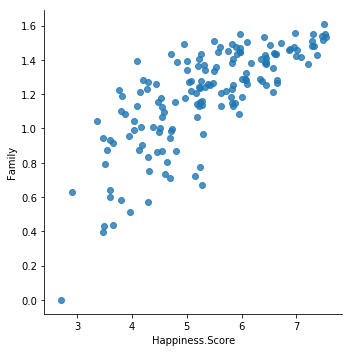

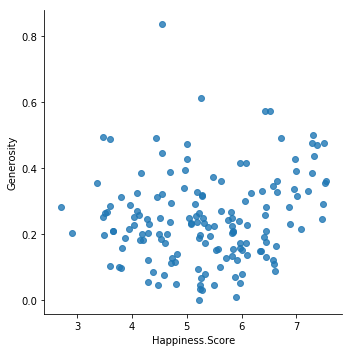

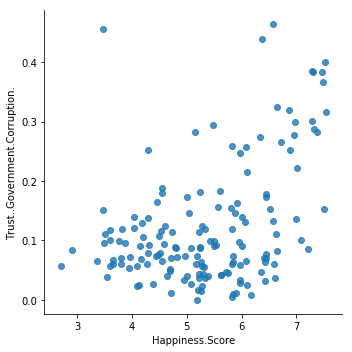

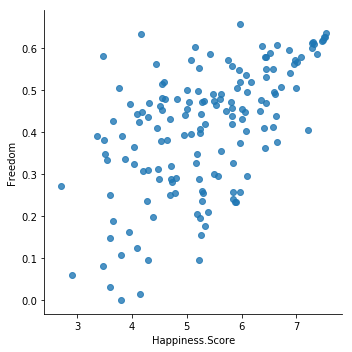

In [7]:
visualize_happiness(df)

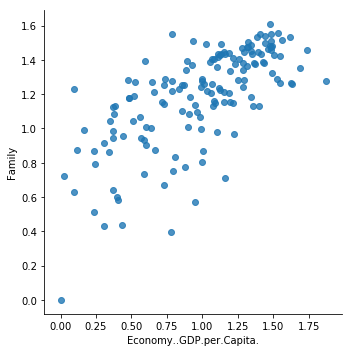

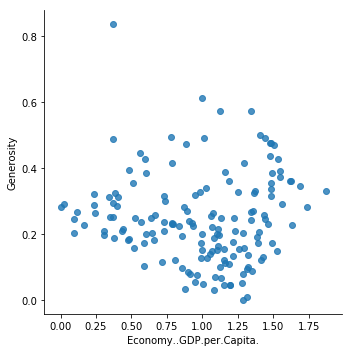

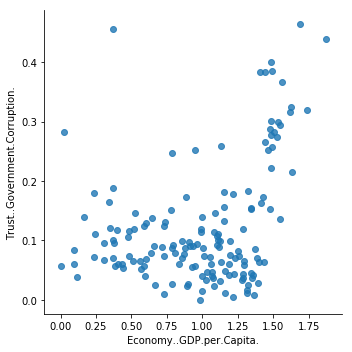

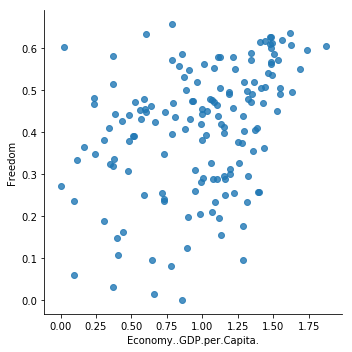

In [8]:
visualize_economy(df)

<p>GDP per Capita seems the strongest variable connection to happiness</p>
<p>Generosity doesn't seem to make anyone happy</p>
<p>Freedom might be possible connection to happiness(we'll see below)</p>
<p>You would think happy people equals good Government right? Think again!</p>
<p>Family might be connected to happiness(we'll see below)</p>
<p>Does happiness affect Life Expectancy?(we'll see below)</p>

<h2>As it seems Economy and Happiness seem to go hand in hand</h2>

<p>With an R^2 of 0.660105 <br> The data seems to fit quite nicely with those two variables </p>

R Squared value is:  0.660105476042


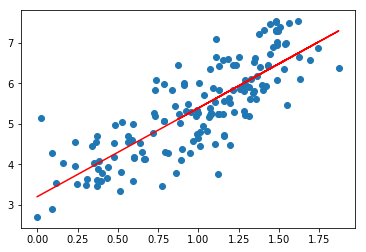

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(gdp, happiness_score)

print('R Squared value is: ', r_value ** 2)
fitLine = predict(gdp)
plt.scatter(gdp, happiness_score)
plt.plot(gdp, fitLine, c='r')
plt.show()

<h1>Fun Fact:</h1>

<p>The more money you have the longer you live. Money seems to be more important than any other factor in life expectancy<br>As you will see below.</p>

R Squared value is:  0.710778220555


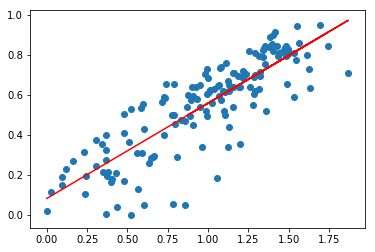

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(gdp, life_exp)
print('R Squared value is: ', r_value ** 2)
fitLine = predict(gdp)
plt.scatter(gdp, life_exp)
plt.plot(gdp, fitLine, c='r')
plt.show()

<h1>Does Happiness make you live longer?</h1>

<p>Well... Yes, considering that happiness is increased with the GDP factor(Money). As you can see in the previous R Squared 
we got 0.710 as in the one below 0.611. Clearly showing that money matters more into your life expectancy than happiness</p>


R Squared value is:  0.611446779624


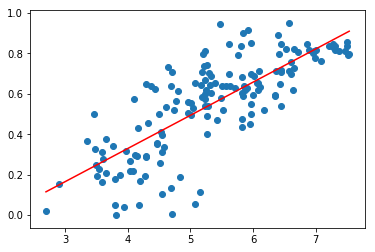

In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(happiness_score, life_exp)

print('R Squared value is: ', r_value ** 2)
fitLine = predict(happiness_score)
plt.scatter(happiness_score, life_exp)
plt.plot(happiness_score, fitLine, c='r')
plt.show()

<h1>Split train and test data, I will be using X as gdp and Y as government trust. You can change them if you wanna see different results with different variables like happiness or life expectancy, etc...</h1>

In [12]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(gdp, gov_trust)


C:\Users\eu\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<h1>Plot of the train data</h1>

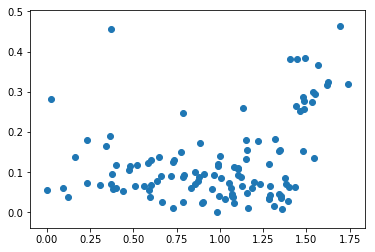

In [13]:
plt.scatter(X_train, Y_train)

plt.show()

<h1>Plot of the test data</h1>

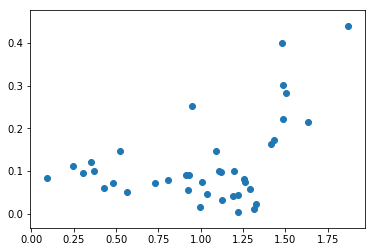

In [14]:
plt.scatter(X_test, Y_test)

plt.show()

R Squared value is: -1.84243933094


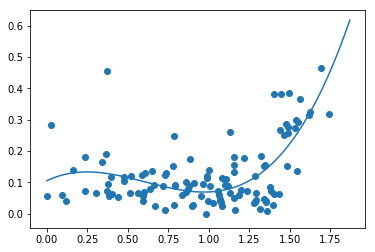

In [15]:
line_size = max(gdp)
pol_regres = np.poly1d(np.polyfit(X_train, Y_train, 3))
xp = np.linspace(0, line_size, len(X_train))
plt.scatter(X_train, Y_train)
plt.plot(xp, pol_regres(xp))
r2 = r2_score(Y_train ,pol_regres(xp))
print('R Squared value is:', r2)
plt.show()

0.491943632189


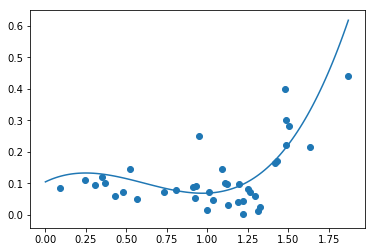

In [16]:
xp = np.linspace(0, line_size, 120)
plt.scatter(X_test, Y_test)
plt.plot(xp, pol_regres(xp))
r2 = r2_score(Y_test, pol_regres(X_test))
print(r2)
plt.show()

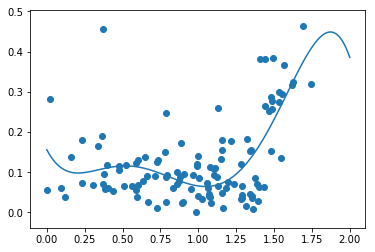

In [17]:
plt.scatter(X_train, Y_train)
p4 = np.poly1d(np.polyfit(gdp,gov_trust, 5))
xp = np.linspace(0, 2, 150)
plt.plot(xp, p4(xp))
plt.show()

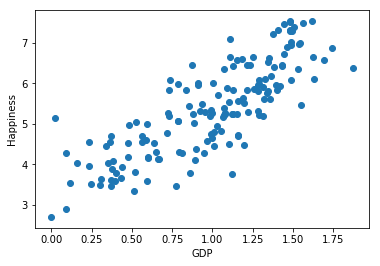

In [18]:
plt.xlabel('GDP')
plt.ylabel('Happiness')
plt.scatter(gdp, happiness_score)
plt.show()